# Week 2
## Timo Ijäs
## Introduction to Data Science

### Exercise 1 

In [2]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df= df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [4]:
def firstCharOrd(lin):
    if pd.isna(lin):
        return lin
    else:
        return ord(lin[0])
    
def firstChar(lin):
    if pd.isna(lin):
        return lin
    else:
        return lin[0]

In [5]:
ord(df['Cabin'][10][0])

71

In [6]:
test = firstChar(df['Cabin'][0])
test

nan

In [7]:
chars = df['Cabin'].apply(lambda x: firstChar(x))
chars.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [8]:
df['Cabin']
cabN = df['Cabin'].apply(lambda x: firstCharOrd(x))

In [9]:
cabN.head()

0     NaN
1    67.0
2     NaN
3    67.0
4     NaN
Name: Cabin, dtype: float64

In [10]:
mode = cabN.mode()[0]
cabN = cabN.fillna(mode)
df['Deck'] = cabN
df['Deck'] = df['Deck'] - df['Deck'].min()
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck
0,0,3,male,22.0,1,0,7.2500,NaN,S,2.0
1,1,1,female,38.0,1,0,71.2833,C85,C,2.0
2,1,3,female,26.0,0,0,7.9250,NaN,S,2.0
3,1,1,female,35.0,1,0,53.1000,C123,S,2.0
4,0,3,male,35.0,0,0,8.0500,NaN,S,2.0


In [11]:
df= df.drop(columns=['Cabin'])
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,male,22.0,1,0,7.2500,S,2.0
1,1,1,female,38.0,1,0,71.2833,C,2.0
2,1,3,female,26.0,0,0,7.9250,S,2.0
3,1,1,female,35.0,1,0,53.1000,S,2.0
4,0,3,male,35.0,0,0,8.0500,S,2.0
5,0,3,male,NaN,0,0,8.4583,Q,2.0
6,0,1,male,54.0,0,0,51.8625,S,4.0
7,0,3,male,2.0,3,1,21.0750,S,2.0
8,1,3,female,27.0,0,2,11.1333,S,2.0
9,1,2,female,14.0,1,0,30.0708,C,2.0


In [12]:
for (columnName, columnData) in df.iteritems():
   print(str(columnData.isna().sum()) + " NaN in " + columnName)

0 NaN in Survived
0 NaN in Pclass
0 NaN in Sex
177 NaN in Age
0 NaN in SibSp
0 NaN in Parch
0 NaN in Fare
2 NaN in Embarked
0 NaN in Deck


In [13]:
mean = round(df['Age'].mean(),1)
print(mean)
df2 = df['Age'].fillna(mean)
df2

29.7


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.7
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
df['Age'] = df2
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,male,22.0,1,0,7.2500,S,2.0
1,1,1,female,38.0,1,0,71.2833,C,2.0
2,1,3,female,26.0,0,0,7.9250,S,2.0
3,1,1,female,35.0,1,0,53.1000,S,2.0
4,0,3,male,35.0,0,0,8.0500,S,2.0
5,0,3,male,29.7,0,0,8.4583,Q,2.0
6,0,1,male,54.0,0,0,51.8625,S,4.0
7,0,3,male,2.0,3,1,21.0750,S,2.0
8,1,3,female,27.0,0,2,11.1333,S,2.0
9,1,2,female,14.0,1,0,30.0708,C,2.0


In [15]:
mode = df['Embarked'].mode()[0]
print(mode)
df2 = df['Embarked'].fillna(mode)
print(df2.isna().sum())
df['Embarked'] = df2
df.head()

S
0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,male,22.0,1,0,7.2500,S,2.0
1,1,1,female,38.0,1,0,71.2833,C,2.0
2,1,3,female,26.0,0,0,7.9250,S,2.0
3,1,1,female,35.0,1,0,53.1000,S,2.0
4,0,3,male,35.0,0,0,8.0500,S,2.0


In [16]:
df['Sex']= df['Sex'].map({'female': 0, 'male':1})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,1,22.0,1,0,7.2500,S,2.0
1,1,1,0,38.0,1,0,71.2833,C,2.0
2,1,3,0,26.0,0,0,7.9250,S,2.0
3,1,1,0,35.0,1,0,53.1000,S,2.0
4,0,3,1,35.0,0,0,8.0500,S,2.0


In [17]:
df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2})

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,1,22.0,1,0,7.2500,0,2.0
1,1,1,0,38.0,1,0,71.2833,1,2.0
2,1,3,0,26.0,0,0,7.9250,0,2.0
3,1,1,0,35.0,1,0,53.1000,0,2.0
4,0,3,1,35.0,0,0,8.0500,0,2.0


In [19]:
df.to_csv('Titanic_mod.csv')

In [20]:
import json
df.to_json(r'Titanic_mod.json', orient ="records")


In [21]:
df3 = pd.read_json('Titanic_mod.json')
df3['Age'].mean()

29.69929292929302

## Exercise 2

In [22]:
# Separate survivors and non-survivors

survivors = df3.loc[(df3['Survived']==1)]
nonSurvivors = df3.loc[(df3['Survived']==0)]

In [23]:
# Function for calculating averages or means to calculate average traveler

def averageTraveler(data):
    avData = pd.DataFrame()
    avData['Survived'] = [data['Survived'].mode()[0]]
    avData['Pclass'] = [data['Pclass'].mode()[0]]
    avData['Sex'] = [data['Sex'].mode()[0]]
    avData['Age'] = [data['Age'].mean()]
    avData['SibSp'] = [data['SibSp'].mode()[0]]
    avData['Parch'] = [data['Parch'].mode()[0]]
    avData['Fare'] = [data['Fare'].mean()]
    avData['Embarked'] = [data['Embarked'].mode()[0]]
    avData['Deck'] = [data['Deck'].mode()[0]]
    return avData
    

In [24]:
# Calculate average traveler, survivor and non-survivor

avSurv = averageTraveler(survivors)
avNonSurv = averageTraveler(nonSurvivors)
avTrav = averageTraveler(df3)

print(avTrav.head())
print(avSurv.head())
print(avNonSurv.head())

   Survived  Pclass  Sex        Age  SibSp  Parch       Fare  Embarked  Deck
0         0       3    1  29.699293      0      0  32.204208         0     2
   Survived  Pclass  Sex        Age  SibSp  Parch       Fare  Embarked  Deck
0         1       1    0  28.549912      0      0  48.395408         0     2
   Survived  Pclass  Sex        Age  SibSp  Parch       Fare  Embarked  Deck
0         0       3    1  30.415301      0      0  22.117887         0     2


#### Finding the person closest to average in each class

* I thought I'd like to give each person a 'rating' based on how close they are to the average person
* I calculate how far each attribute of each person is from the average person
* "Far" = how many standard deviations each value is away from the mean/mode of each corresponding value of average person

In [25]:
# Calculate standard deviations of all columns for all types

def calcStds(data):
    stds= pd.DataFrame()
    for(colName,colData) in data.iteritems():
        stds[colName] = [data[colName].std()]
    return stds

In [26]:

survStds = calcStds(survivors)
nonSurvStds = calcStds(nonSurvivors)
allStds = calcStds(df3)

print(allStds)
print(survStds)
print(nonSurvStds)


   Survived    Pclass      Sex        Age     SibSp     Parch       Fare  \
0  0.486592  0.836071  0.47799  13.002015  1.102743  0.806057  49.693429   

   Embarked      Deck  
0  0.635673  0.904732  
   Survived    Pclass      Sex        Age     SibSp     Parch       Fare  \
0       0.0  0.863321  0.46666  13.772509  0.708688  0.771712  66.596998   

   Embarked      Deck  
0  0.651082  0.904259  
   Survived    Pclass       Sex        Age     SibSp     Parch       Fare  \
0       0.0  0.735805  0.354968  12.457359  1.288399  0.823166  31.388207   

   Embarked      Deck  
0  0.620478  0.903803  


In [27]:
survStds['Age']

0    13.772509
Name: Age, dtype: float64

In [28]:
#survivors['values'] =0.0
#for index, row in survivors.iterrows():
#    row2 = abs((row-avSurv)/survStds)
#    value = row2.sum(axis=1)
#    survivors.at[index, 'values'] = value

In [29]:
# Function for calculating how many standard deviations each cell is from mean/mode
# and adding the values together to calculate how different the corresponding person is
# from the average traveler.

def calcValues(df, av, std):
    df['Diff'] = 0.0
    for index, row in df.iterrows():
        row2 = abs((row-av)/std)
        value = row2.sum(axis=1)
        df.at[index,'Diff']=value

In [30]:
# Find out how different each person is from the average person in corresponding group

calcValues(survivors, avSurv, survStds)
calcValues(nonSurvivors,avNonSurv,nonSurvStds)
calcValues(df3,avTrav,allStds)

C:\Users\tipe_\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
# Find index and data of the person closest to average survivor

avSurvId = survivors['Diff'].idxmin()
print(avSurvId)
print('Closest average survivor: ')
print(survivors.loc[avSurvId])
print('Average survivor: ')
print(avSurv)

290
Closest average survivor: 
Survived     1.000000
Pclass       1.000000
Sex          0.000000
Age         26.000000
SibSp        0.000000
Parch        0.000000
Fare        78.850000
Embarked     0.000000
Deck         2.000000
Diff         0.642442
Name: 290, dtype: float64
Average survivor: 
   Survived  Pclass  Sex        Age  SibSp  Parch       Fare  Embarked  Deck
0         1       1    0  28.549912      0      0  48.395408         0     2


In [32]:
# Find index and data of the person closest to average non-survivor

avDedId = nonSurvivors['Diff'].idxmin()
print(avDedId)
print('Closest average non-survivor: ')
print(nonSurvivors.loc[avDedId])
print('Average non-survivor: ')
print(avNonSurv)

508
Closest average non-survivor: 
Survived     0.000000
Pclass       3.000000
Sex          1.000000
Age         28.000000
SibSp        0.000000
Parch        0.000000
Fare        22.525000
Embarked     0.000000
Deck         2.000000
Diff         0.206856
Name: 508, dtype: float64
Average non-survivor: 
   Survived  Pclass  Sex        Age  SibSp  Parch       Fare  Embarked  Deck
0         0       3    1  30.415301      0      0  22.117887         0     2


In [33]:
# Find index and data of the person closest to average passenger

avId = df3['Diff'].idxmin()
print(avId)
print('Closest average traveler: ')
print(df3.loc[avId])
print('Average traveler: ')
print(avTrav)

508
Closest average traveler: 
Survived     0.000000
Pclass       3.000000
Sex          1.000000
Age         28.000000
SibSp        0.000000
Parch        0.000000
Fare        22.525000
Embarked     0.000000
Deck         2.000000
Diff         0.325473
Name: 508, dtype: float64
Average traveler: 
   Survived  Pclass  Sex        Age  SibSp  Parch       Fare  Embarked  Deck
0         0       3    1  29.699293      0      0  32.204208         0     2


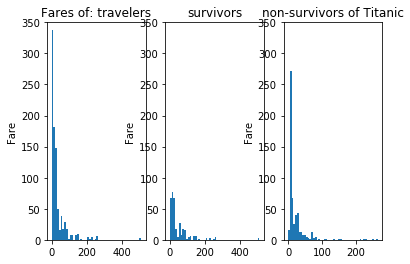

In [91]:
import matplotlib.pyplot as plt
fig, (ax1, ax2,ax3) = plt.subplots(1,3);
ax = df3['Fare'].plot.hist(bins=50, ax=ax1,ylim=(0,350))
ax1.set_ylabel("People")
ax1.set_ylabel("Fare")
ax1.set_title("Fares of: travelers")

ax = survivors['Fare'].plot.hist(bins=50, ax=ax2,ylim=(0,350))
ax2.set_ylabel("People")
ax2.set_ylabel("Fare")
ax2.set_title("survivors")

ax = nonSurvivors['Fare'].plot.hist(bins=50, ax=ax3,ylim=(0,350))
ax3.set_ylabel("People")
ax3.set_ylabel("Fare")
ax3.set_title("non-survivors of Titanic")
plt.show()

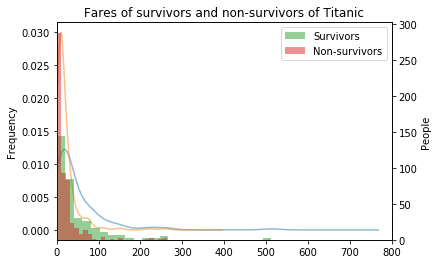

In [35]:
plt.figure();
ax = survivors['Fare'].plot.kde(alpha=0.5)
nonSurvivors['Fare'].plot.kde(ax=ax, alpha=0.5)
ax = survivors['Fare'].plot.hist(ax=ax,secondary_y=True,alpha=0.5, label="Survivors",bins=25)
nonSurvivors['Fare'].plot.hist(ax=ax, secondary_y=True,alpha=0.5,label="Non-survivors",bins=25)
ax.set_ylabel("People")
ax.set_title("Fares of survivors and non-survivors of Titanic")
ax.set_xlim(0,800)
plt.legend(loc="upper right")
plt.show()


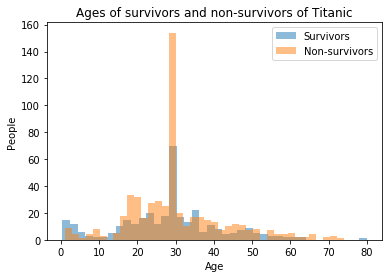

In [36]:
plt.figure();
ax = survivors['Age'].plot.hist(alpha=0.5, label="Survivors",bins=40)
nonSurvivors['Age'].plot.hist(ax=ax,alpha=0.5,label="Non-survivors",bins=40)
ax.set_xlabel("Age")
ax.set_ylabel("People")
ax.set_title("Ages of survivors and non-survivors of Titanic")
#ax.set_xlim(0,800)
plt.legend(loc="upper right")

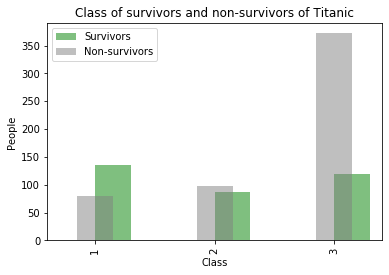

In [37]:
plt.figure();
ax = survivors['Pclass'].value_counts().sort_index().plot.bar(alpha=0.5, label="Survivors",color="Green",align='edge',width=0.3)
nonSurvivors['Pclass'].value_counts().sort_index().plot.bar(ax=ax,alpha=0.5,label="Non-survivors",color="Grey",align='center',width=0.3)
ax.set_xlabel("Class")
ax.set_ylabel("People")
ax.set_title("Class of survivors and non-survivors of Titanic")
#plt.xticks([1,2,3])
#ax.set_xlim(0,800)
plt.legend(loc="upper left")

<Figure size 432x288 with 0 Axes>

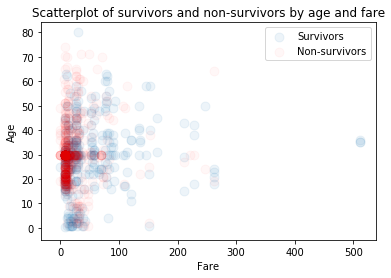

In [38]:
#df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

plt.figure();
ax = survivors.plot.scatter(x='Fare', y='Age', s=80,alpha=0.08, label="Survivors")
nonSurvivors.plot.scatter(ax=ax,x='Fare',y='Age', color="Red",s=80,alpha=0.03, label="Non-survivors")
ax.set_title("Scatterplot of survivors and non-survivors by age and fare")
plt.legend(loc="upper right")

### RECALL
I think adding missing values as mode and mean worked in the embarked class. But not too well in deck and age because there were so many missing values. I also don't think dropping half of the data would have been good either. Better ways of fixing missing info could have been:

* imputation of normal distribution 
* imputation of the distribution of the existing data
* imputation of the distribution of demographics of US or Britain at the time
* predicting missing ages based on other fields
* predicting missing ages based on information and literature available on the topic
* combining the methods

## Exercise 3

Find the most common words in each file. What are they? Are some of them clearly general terms relating to the nature of the data, and not just the emotion?

In [3]:
pos = pd.read_csv("pos.txt",header=None)
neg = pd.read_csv("neg.txt",header=None)

In [4]:
pos.columns=['Words']
neg.columns=['Words']

In [6]:
import collections

counter = collections.Counter(pos['Words'])
comPos = counter.most_common()
counter

Counter({'need set jumper cabl new car good review good price use few time alreadi suppos complaint therewhat 12 feet realli isnt ideal length sure pull up front bumper front bumper plenti long lot time besid anoth car cant realli close recommend someth littl longer 12great brand 16 version though': 1,
         'long cabl work fine truck qualiti seem littl shabbi side money expect 200 dollar snapon jumper cabl seem more see chines knock shop harbor freight 30 buck': 1,
         'cant comment much use come back updat review find issu first use built solid nice tough big hard clamp love have long cabl never move car around anyth need bought new truck alway need cabl anoth reason tow travel trailer run batteri shore power die coupl day need quick small recharg perfect length pop hood run cabl back truck hook up batteri tongu travel trailer run truck 3045 minut nice larg gaug wire connect batteri tot trailer batteri give bit charg pinch shore power solar gener rechargebought bucket boss 06

In [7]:
print(pos['Words'].isna().sum())
print(neg['Words'].isna().sum())

5
1


In [8]:
pos = pos.dropna()
neg = neg.dropna()


In [9]:
neg['Words'].isna().sum()

0

In [16]:
posList=(' '.join(pos['Words'].tolist())).split()
posList[:10]

['need',
 'set',
 'jumper',
 'cabl',
 'new',
 'car',
 'good',
 'review',
 'good',
 'price']

In [12]:
posCounts = collections.Counter(posList)
posCounts.most_common(20)

[('use', 14625),
 ('car', 8028),
 ('work', 7550),
 ('one', 6594),
 ('veri', 5586),
 ('product', 5565),
 ('great', 5323),
 ('well', 5067),
 ('good', 4974),
 ('up', 4855),
 ('out', 4669),
 ('time', 3975),
 ('need', 3969),
 ('more', 3837),
 ('look', 3779),
 ('batteri', 3501),
 ('easi', 3416),
 ('make', 3334),
 ('clean', 3185),
 ('light', 3092)]

In [13]:
negList=(' '.join(neg['Words'].tolist())).split()
negCounts = collections.Counter(negList)
negCounts.most_common(20)

[('use', 891),
 ('one', 594),
 ('product', 592),
 ('work', 561),
 ('car', 503),
 ('out', 425),
 ('up', 382),
 ('veri', 365),
 ('good', 351),
 ('light', 329),
 ('time', 321),
 ('more', 299),
 ('tri', 298),
 ('dont', 279),
 ('blade', 268),
 ('batteri', 264),
 ('even', 256),
 ('look', 248),
 ('back', 244),
 ('better', 236)]

In [14]:
negCounts.most_common()[43][0]

'amazon'

Clearly a lot of the words are only related to the topic, not the emotion.

In [15]:
posUniq = len(collections.Counter(posList))

negUniq = len(collections.Counter(negList))
negUniq

7641

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

bagOfWordsA = posList

bagOfWordsB = negList

In [51]:
#dense = vectors.todense()
#denselist = dense.tolist()
#tfidf = pd.DataFrame(denselist, columns=feature_names)

In [52]:
uniqueWords = set(bagOfWordsA).union(set(bagOfWordsB))

In [53]:
numOfWordsA = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsA:
    numOfWordsA[word] += 1
numOfWordsB = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsB:
    numOfWordsB[word] += 1

In [54]:
numOfWordsB

{'disintegratesalso': 0,
 'premad': 0,
 '29414ive': 0,
 'becar': 0,
 'samehav': 0,
 '34cut34excel': 0,
 'price4': 0,
 '100v': 0,
 'cm': 0,
 'chemicalso': 0,
 'theaddit': 0,
 'moneyeveryth': 0,
 'rollunrol': 0,
 'apc': 0,
 'waxes3': 0,
 '34like': 0,
 'stablei': 0,
 'fibersanoth': 0,
 'lcoation': 0,
 'torenti': 0,
 'fullelspout': 0,
 'appliedi': 0,
 'sew': 0,
 'hardth': 0,
 'socketthi': 0,
 'mn': 0,
 'environviron': 0,
 'residuenot': 0,
 'wowmi': 0,
 'openclos': 0,
 'databas': 0,
 'ms4021b': 3,
 'sraightforward': 0,
 'phonesometh': 0,
 'explan': 2,
 'afteron': 0,
 'mc': 0,
 'importantdo': 0,
 '3323': 0,
 '34huck34': 0,
 'along': 27,
 'spongewhil': 0,
 'disappear': 3,
 'workalso': 0,
 'lighteraccessori': 0,
 'refrig': 0,
 'lookin': 0,
 'reading34': 0,
 'seatsthos': 0,
 'steel': 10,
 'refresh': 0,
 'jku': 0,
 'shopsperson': 0,
 'caryup': 0,
 'opcion': 0,
 'fixaflat': 0,
 'webftdi': 1,
 'gaugeequip': 0,
 'tailbag': 0,
 'partsth': 1,
 'theseragenrat': 0,
 'decis': 1,
 'cleaner': 50,
 'double

In [55]:
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

In [56]:
tfA = computeTF(numOfWordsA, bagOfWordsA)
tfB = computeTF(numOfWordsB, bagOfWordsB)

In [57]:
def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict

In [58]:
idfs = computeIDF([numOfWordsA, numOfWordsB])

In [59]:
def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [60]:
tfidfA = computeTFIDF(tfA, idfs)
tfidfB = computeTFIDF(tfB, idfs)
df = pd.DataFrame([tfidfA, tfidfB])

In [61]:
df

,disintegratesalso,premad,29414ive,becar,samehav,34cut34excel,price4,100v,cm,chemicalso,...,streaki,cheaperi,roger,constructionit,20t,colada,dimli,housework,starsedit,1015lb
0,8.981464e-07,8.981464e-07,8.981464e-07,0.000004,8.981464e-07,8.981464e-07,8.981464e-07,8.981464e-07,0.000002,8.981464e-07,...,0.0,0.000002,8.981464e-07,8.981464e-07,8.981464e-07,0.0,0.000004,8.981464e-07,8.981464e-07,8.981464e-07
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00


In [62]:
transA=df.transpose()
transA.columns = ['pos','neg']
transA

,pos,neg
disintegratesalso,8.981464e-07,0.0
premad,8.981464e-07,0.0
29414ive,8.981464e-07,0.0
becar,3.592586e-06,0.0
samehav,8.981464e-07,0.0
...,...,...
colada,0.000000e+00,0.0
dimli,3.592586e-06,0.0
housework,8.981464e-07,0.0
starsedit,8.981464e-07,0.0


In [87]:
pos20 = transA['pos'].nlargest(n=20)
pos20

greasi         0.000085
shower         0.000084
skeptic        0.000077
longev         0.000075
pink           0.000075
boy            0.000073
easiest        0.000064
ethanol        0.000063
jb             0.000062
aftermarket    0.000059
winch          0.000057
cordless       0.000057
interv         0.000054
thoroughli     0.000053
visor          0.000053
saver          0.000052
furnitur       0.000051
particl        0.000050
permatex       0.000049
rpm            0.000048
Name: pos, dtype: float64

In [64]:
posCounts.most_common(20)

[('use', 14625),
 ('car', 8028),
 ('work', 7550),
 ('one', 6594),
 ('veri', 5586),
 ('product', 5565),
 ('great', 5323),
 ('well', 5067),
 ('good', 4974),
 ('up', 4855),
 ('out', 4669),
 ('time', 3975),
 ('need', 3969),
 ('more', 3837),
 ('look', 3779),
 ('batteri', 3501),
 ('easi', 3416),
 ('make', 3334),
 ('clean', 3185),
 ('light', 3092)]

In [86]:
neg20 =transA['neg'].nlargest(n=20)
neg20

155v          0.000077
desulfin      0.000066
doggl         0.000044
protectal     0.000044
axxess        0.000044
dud           0.000044
aswc          0.000044
vcd           0.000044
cynch         0.000044
letdown       0.000033
jtech         0.000033
tstat         0.000033
autodetect    0.000033
154v          0.000033
glisten       0.000033
panti         0.000033
jpg           0.000033
vpower        0.000033
375           0.000033
156v          0.000033
Name: neg, dtype: float64

In [66]:
negCounts.most_common(20)

[('use', 891),
 ('one', 594),
 ('product', 592),
 ('work', 561),
 ('car', 503),
 ('out', 425),
 ('up', 382),
 ('veri', 365),
 ('good', 351),
 ('light', 329),
 ('time', 321),
 ('more', 299),
 ('tri', 298),
 ('dont', 279),
 ('blade', 268),
 ('batteri', 264),
 ('even', 256),
 ('look', 248),
 ('back', 244),
 ('better', 236)]

In [79]:
negCounts.most_common(20)
df = pd.DataFrame(negCounts.most_common(20), columns =['Word', 'Score', 'Score']) 


tuple

The words are not the same. Nowhere near.

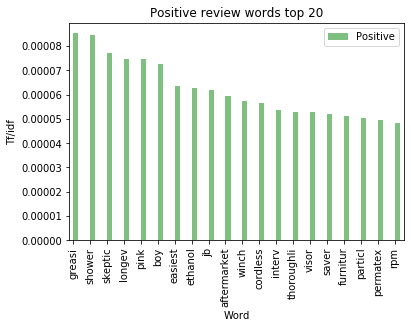

In [109]:
plt.figure();
ax = pos20.plot.bar(alpha=0.5, label="Positive",color="Green",align='edge',width=0.3)
ax.set_xlabel("Word")
ax.set_ylabel("Tf/idf")
ax.set_title("Positive review words top 20")
#plt.xticks([1,2,3])
#ax.set_xlim(0,800)
plt.legend(loc="upper right")

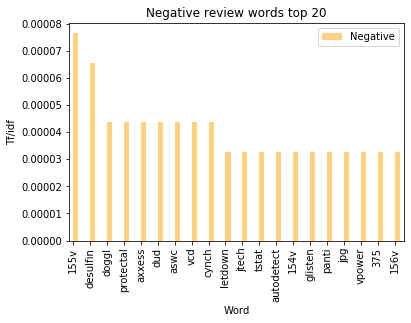

In [110]:
plt.figure();
ax = neg20.plot.bar(alpha=0.5, label="Negative",color="Orange",align='edge',width=0.3)
ax.set_xlabel("Word")
ax.set_ylabel("Tf/idf")
ax.set_title("Negative review words top 20")
#plt.xticks([1,2,3])
#ax.set_xlim(0,800)
plt.legend(loc="upper right")

## Exercise 4
Bad data visualizations

In [121]:
live = {'IMDB': [7.4, 6.9, 7.1,6.3, 7.0, 6.4, 5.7, 6.9, 5.4], 'Sales': [966.6, 542.4, 1264.0, 353.3, 1051.0, 1025.0, 531.27, 1698.59, 37.6]}
liveDf = pd.DataFrame(data=live,index=["The Jungle Book","Cinderella", "Beauty and the Beast", "Dumbo", "Aladdin", "Alice in Wonderland", "101 Dalmatians", "The Lion King", "Mulan"])

cart = {'IMDB': [7.6, 7.3, 8.0, 7.2, 8.0, 7.4, 7.2, 8.5, 7.6], 'Sales': [2941.59, 2842.92, 839.68, 22.99, 933.7, 26.25, 2633.95, 1657.0, 485.23]}
cartDf = pd.DataFrame(data=cart,index=["The Jungle Book","Cinderella", "Beauty and the Beast", "Dumbo", "Aladdin", "Alice in Wonderland", "101 Dalmatians", "The Lion King", "Mulan"])


<Figure size 432x288 with 0 Axes>

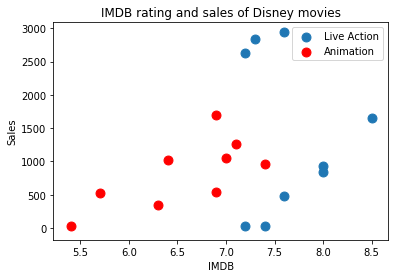

In [128]:
plt.figure();
ax = cartDf.plot.scatter(x='IMDB', y='Sales', s=80, label="Live Action")
liveDf.plot.scatter(ax=ax,x='IMDB',y='Sales', color="Red",s=80, label= "Animation")
ax.set_title("IMDB rating and sales of Disney movies")
plt.legend(loc="upper right")
